In [1]:
import pandas as pd
path1 = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_memory1.csv"
path2 = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_memory2.csv"
linux_mem1 = pd.read_csv(path1)
linux_mem2 = pd.read_csv(path2)
print(linux_mem1.shape)
print(linux_mem2.shape)
linux_mem = pd.concat([linux_mem1, linux_mem2])

print(linux_mem.shape)
linux_mem.head()

C:\Users\mashr\AppData\Local\Temp\ipykernel_13740\3913957181.py:5: DtypeWarning: Columns (2,3,4,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  linux_mem2 = pd.read_csv(path2)


(1000000, 13)
(1000000, 13)
(2000000, 13)


,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label,type
0,1554218915,3257,859502,54,193,2.0,519.1,2.0,519.1,0.14,Web-Content,0,normal
1,1554218920,3197,247354,95,193,2.6,402.0,2.6,402.0,0.11,firefox,0,normal
2,1554218925,1442,57311,33,2219,764.2,290.7,764.2,290.7,0.08,Xorg,0,normal
3,1554218930,3119,68006,17,3063,725.9,116.8,725.9,116.8,0.03,update-manager,0,normal
4,1554218935,2797,72300,69,1350,1.4,109.6,1.4,109.6,0.03,nautilus,0,normal


In [2]:
linux_mem.drop('ts', axis = 1, inplace=True)
linux_mem.drop('type', axis = 1, inplace= True)

linux_mem.head()

,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label
0,3257,859502,54,193,2.0,519.1,2.0,519.1,0.14,Web-Content,0
1,3197,247354,95,193,2.6,402.0,2.6,402.0,0.11,firefox,0
2,1442,57311,33,2219,764.2,290.7,764.2,290.7,0.08,Xorg,0
3,3119,68006,17,3063,725.9,116.8,725.9,116.8,0.03,update-manager,0
4,2797,72300,69,1350,1.4,109.6,1.4,109.6,0.03,nautilus,0


In [3]:
linux_mem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   MINFLT  object 
 2   MAJFLT  object 
 3   VSTEXT  object 
 4   VSIZE   float64
 5   RSIZE   object 
 6   VGROW   object 
 7   RGROW   object 
 8   MEM     float64
 9   CMD     object 
 10  label   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 183.1+ MB


In [4]:
linux_mem.isnull().sum().sum()

0

In [5]:
linux_mem['VGROW'] = (linux_mem['VGROW'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['VGROW'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B', ' '], [10**3, 10**6, 10**9, '']).astype(int))

linux_mem['MINFLT'] = (linux_mem['MINFLT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['MINFLT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['MAJFLT'] = (linux_mem['MAJFLT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['MAJFLT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['VSTEXT'] = (linux_mem['VSTEXT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['VSTEXT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['RGROW'] = (linux_mem['RGROW'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['RGROW'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['RSIZE'] = (linux_mem['RSIZE'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['RSIZE'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_mem['CMD'] = le.fit_transform(linux_mem['CMD'])

col:  PID


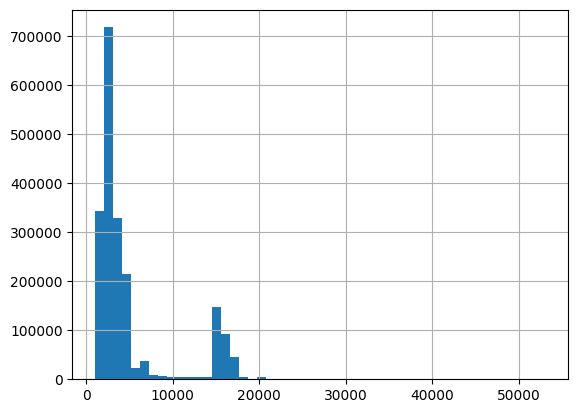

col:  MINFLT


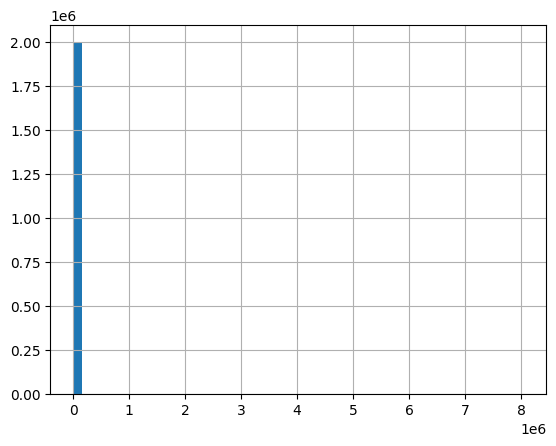

col:  MAJFLT


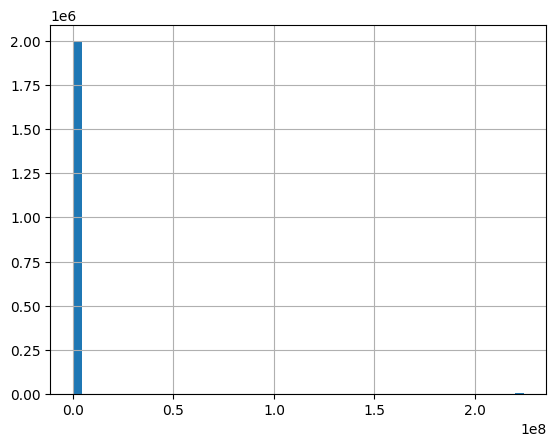

col:  VSTEXT


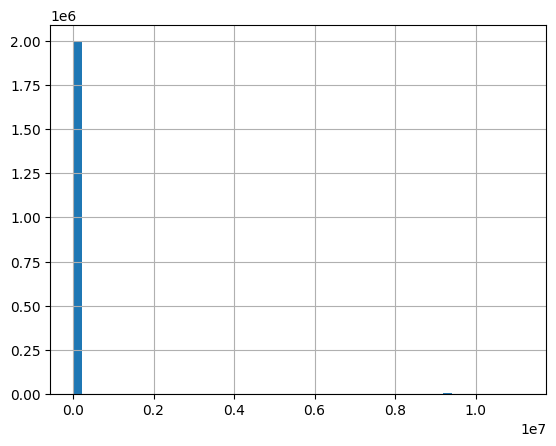

col:  VSIZE


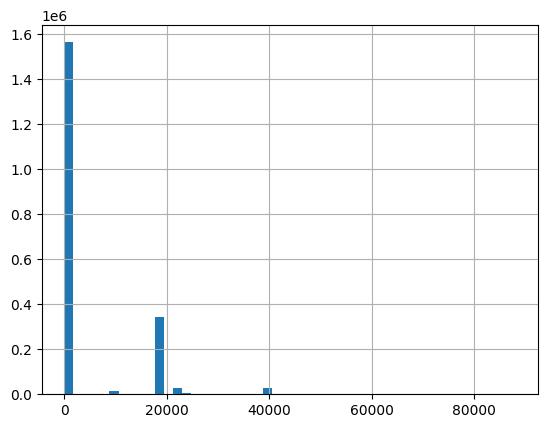

col:  RSIZE


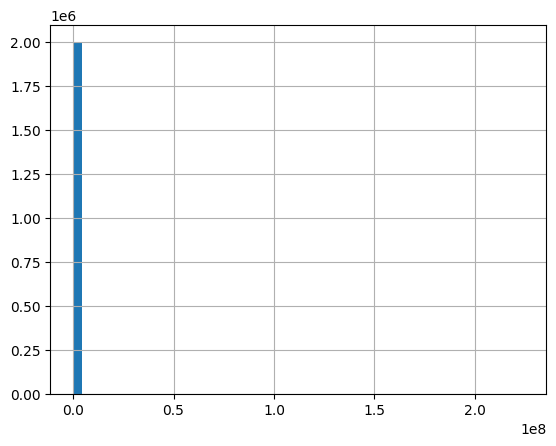

col:  VGROW


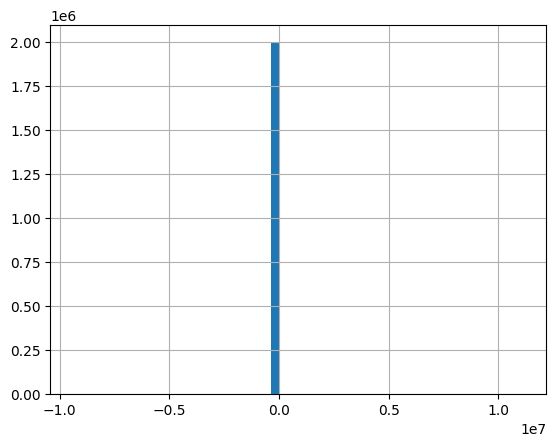

col:  RGROW


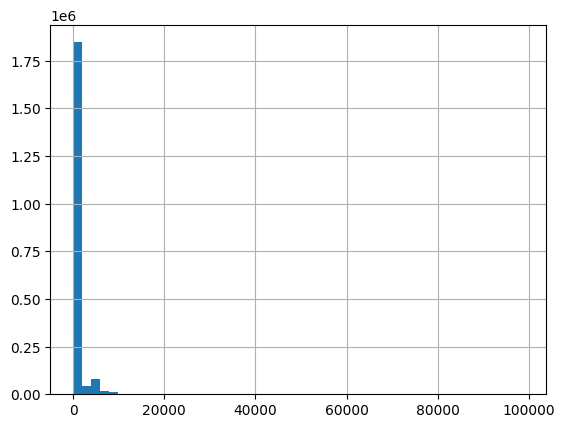

col:  MEM


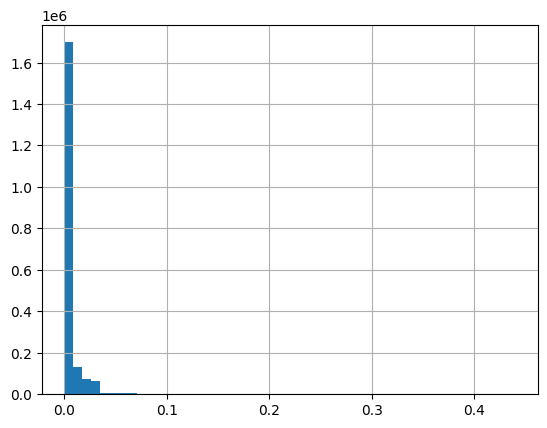

col:  CMD


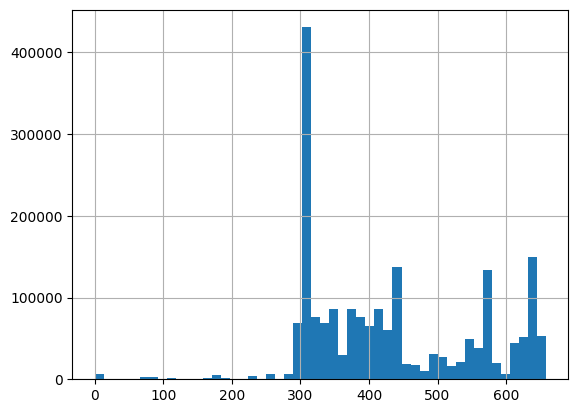

col:  label


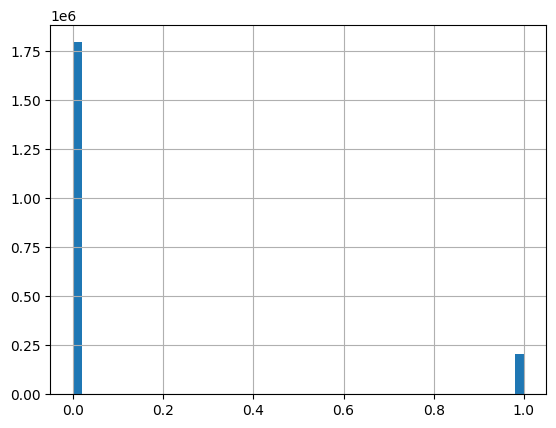

In [8]:
import matplotlib.pyplot as plt
columns = linux_mem.columns
for col in columns:
    print("col: ", col)
    linux_mem[col].hist(bins = 50)
    plt.show()

In [9]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [10]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [11]:
x = linux_mem.drop('label', axis = 1)
y = linux_mem['label']

# Without Oversampling

In [12]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score: ',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score:  0.927982
F1 Score: 0.596515764281871


# Oversampling

In [13]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1570080, 1: 179920}
After oversampling {0: 1570080, 1: 1570080}


In [14]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.8773874579639254
F1 Score: 0.8782656389607625


# ^HUGE IMPROVEMENT when oversampled

# Undersampling

<AxesSubplot: xlabel='label', ylabel='count'>

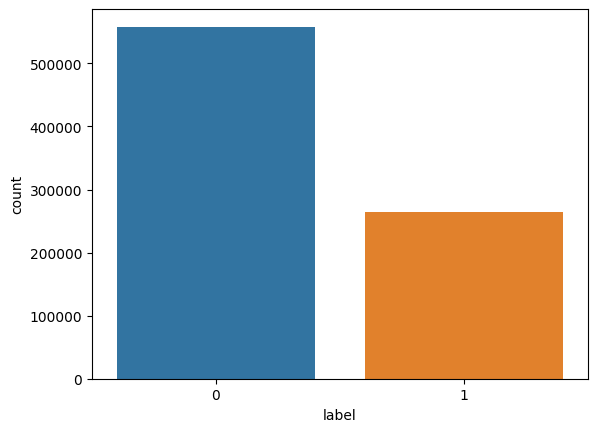

In [15]:
target = 'label'

import numpy as np
minority_class_len = len(linux_mem[linux_mem[target] == 1])
majority_class_indices = linux_mem[linux_mem[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)

minority_class_indices = linux_mem[linux_mem[target] == 1].index

under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

under_sample = linux_mem.loc[under_sample_indices]

import seaborn as sns
sns.countplot(x = target, data = under_sample)

In [17]:
und_x = under_sample.loc[:, linux_mem.columns !=target]
und_y = under_sample.loc[:, linux_mem.columns == target]

from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.8553019349228616
F1 Score: 0.7602781290220341


# Undersampling better than no sampling